In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter_mov20_mejor.txt', sep='\t')
df = pd.read_csv('../histogramfilter_filtrado.txt',  sep='\t')

In [74]:
df.head()

,Unnamed: 0,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,...,delta_predicted_x,delta_predicted_y,delta_predicted_theta,pos_odom_x,pos_odom_y,pos_odom_theta,delta_odom_x,delta_odom_y,delta_odom_theta,delta_time
0,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN
1,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN
2,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN
3,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN
4,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN


In [80]:
df.loc[0:20, ['global_x', 'global_y', 'predicted_x', 'predicted_y', 'delta_predicted_y', 'delta_odom_y']]

,global_x,global_y,predicted_x,predicted_y,delta_predicted_y,delta_odom_y
0,0.00000,0.00000,0.0,0.0,0.0,-0.0
1,0.00000,0.00000,0.0,0.0,0.0,-0.0
2,0.75005,3.47966,0.0,0.0,0.0,-0.0
3,0.75005,3.47967,0.0,0.0,0.0,-0.0
4,0.75005,3.47968,0.0,0.0,0.0,-0.0
5,0.75005,3.47968,0.0,0.0,0.0,-0.0
6,0.75005,3.47969,0.0,0.0,0.0,-0.0
7,0.75005,3.47970,0.0,0.0,0.0,-0.0
8,0.75005,3.47971,0.0,0.0,0.0,-0.0
9,0.75005,3.47972,0.0,0.0,0.0,-0.0


In [76]:
# global pose
inicio = 30
fin = 150

X = df['global_x'].values[inicio:fin]
Y = df['global_y'].values[inicio:fin]
Yaw = df['global_theta'].values[inicio:fin]

X_origen = X - 0.749900
Y_origen = Y - 0.004208

U = np.cos(Yaw)
V = np.sin(Yaw)


In [77]:
localization_hist = df.iloc[inicio:fin, 1:140].as_matrix()

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


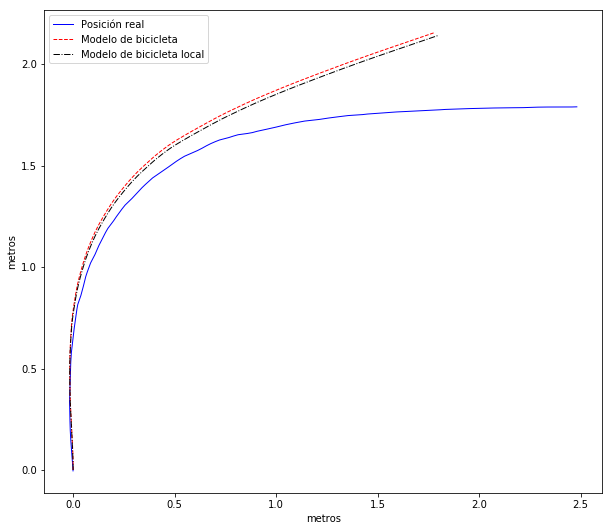

In [81]:
inicio = 2
fin = 300

plt.figure(figsize=(10, 10))

# plt.title("Posición con odometría")

plt.plot(df['global_x'].values[inicio:fin] - 0.75043, \
            df['global_y'].values[inicio:fin] - 3.48389, color='b', linewidth=1, linestyle='-', label='Posición real')

#plt.scatter(df['odom_pos_x'], df['odom_pos_y'], color='r', s=2)
#plt.scatter(df['ack_pos_x'], df['ack_pos_y'], color='k', s=2)

plt.plot(-df['pos_odom_y'].values[inicio:fin], \
            df['pos_odom_x'].values[inicio:fin], color='r', linewidth=1, linestyle='--', label='Modelo de bicicleta')
plt.plot(-df['predicted_y'].values[inicio:fin], \
            df['predicted_x'].values[inicio:fin], color='k', linewidth=1, linestyle='-.', label='Modelo de bicicleta local')

plt.axes().set_aspect('equal')

plt.axes().set_xlabel('metros')
plt.axes().set_ylabel('metros')

plt.legend()
plt.show()

In [7]:
# odometry
odom_X = df['predicted_x'].values[inicio:fin]
odom_Y = df['predicted_y'].values[inicio:fin]

odom_Yaw = df['pos_odom_theta'].values[inicio:fin]
# odom_Yaw = pd.DataFrame({'odom_theta': [1.57] * len(odom_Yaw)})

odom_x_corregida = 0.74 - odom_Y
odom_y_corregida = 0.008 + odom_X

# odom_U = np.cos(odom_Yaw)
# odom_V = np.sin(odom_Yaw)

odom_U_c = np.cos(1.57 + odom_Yaw)
odom_V_c = np.sin(1.57 + odom_Yaw)

In [35]:
print ("max")
print (df.loc[0:300, ['delta_predicted_y', 'delta_odom_y']].max())

print ("min")
print (df.loc[0:300, ['delta_predicted_y', 'delta_odom_y']].min())

# df.loc[100:150, ['delta_predicted_y', 'delta_odom_y']]

max
delta_predicted_y    0.00107
delta_odom_y         0.00115
dtype: float64
min
delta_predicted_y   -0.00095
delta_odom_y        -0.01916
dtype: float64


road width: 140 cm
cell width: 0.01 m


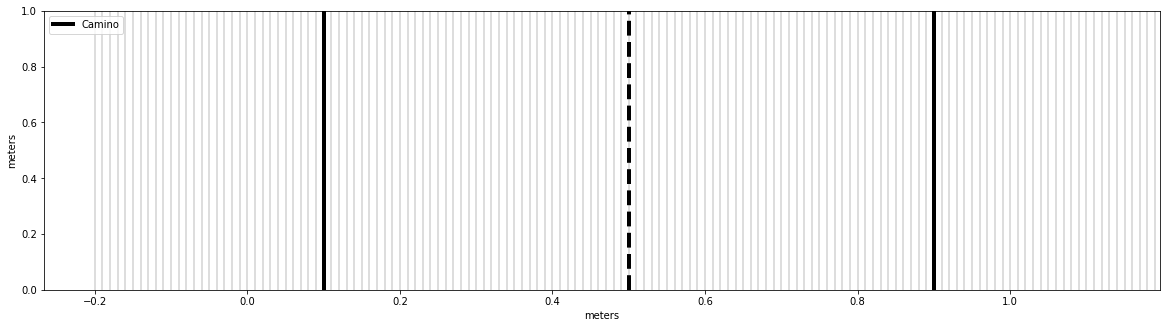

In [71]:
# params
right_x = 0.9 # m
center_x = 0.5 # m
left_x = 0.1 # m
out_road_dist = 0.3 # m
num_states = 7 
state_width = 20

print ("road width: {0} cm".format(num_states * state_width))

# estimate positions to plot discretization
lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
print("cell width: {} m".format(cell_width))
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

# show probabilistic localization
z = localization_hist.flatten() * 254
colors = plt.cm.get_cmap('Blues')(z)
# plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

fig = plt.figure(figsize=(20, 5))
## fig.suptitle('Car in motion on road', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.9)
# ax.set_title('axes title')

# plt.figure()
## ax.set_aspect('equal')
# plt.axes().set_xlim([-0.2, 1.2])

# show discretization of probabilistic localization
for x_i in points_x:
    ax.axvline(x_i, color='lightgray', linestyle='solid')

# lines of road
ax.axvline(right_x, color='k', linestyle='-', linewidth=4, label='Camino') #'k--', linewidth=4)
ax.axvline(center_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
ax.axvline(left_x, color='k', linestyle='-', linewidth=4)  #'k--', linewidth=4)

# show orientation
# for global pose
# Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)

# for odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

## ax.scatter(X, Y, color='r', s=5, label='position from simulator')
## ax.scatter(odom_x_corregida, odom_y_corregida, color='b', s=5, label='position from odometry: velocity model')

ax.set_xlabel('meters')
ax.set_ylabel('meters')

# no se que hace esto
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.legend()
plt.show()

road width: 140 cm
cell width: 0.01 m


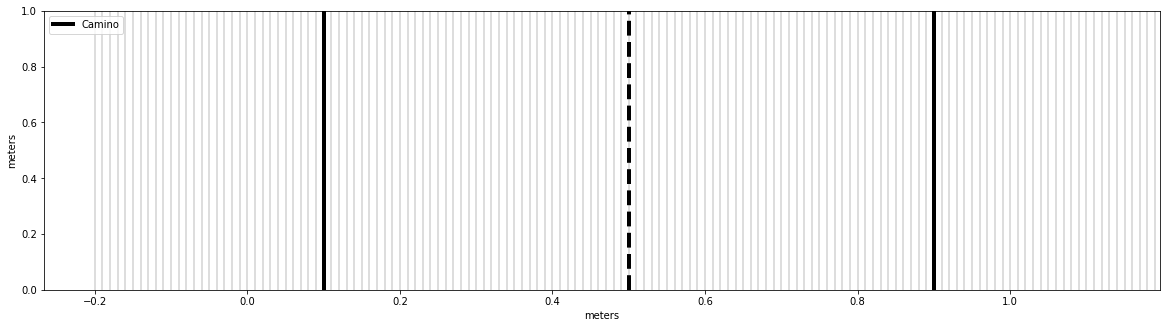

In [71]:
# params
right_x = 0.9 # m
center_x = 0.5 # m
left_x = 0.1 # m
out_road_dist = 0.3 # m
num_states = 7 
state_width = 20

print ("road width: {0} cm".format(num_states * state_width))

# estimate positions to plot discretization
lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
print("cell width: {} m".format(cell_width))
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

# show probabilistic localization
z = localization_hist.flatten() * 254
colors = plt.cm.get_cmap('Blues')(z)
# plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

fig = plt.figure(figsize=(20, 20))
## fig.suptitle('Car in motion on road', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.9)
# ax.set_title('axes title')

# plt.figure()
ax.set_aspect('equal')
# plt.axes().set_xlim([-0.2, 1.2])

# show discretization of probabilistic localization
for x_i in points_x:
    ax.axvline(x_i, color='lightgray', linestyle='solid')

# lines of road
ax.axvline(right_x, color='k', linestyle='-', linewidth=4, label='Camino') #'k--', linewidth=4)
ax.axvline(center_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
ax.axvline(left_x, color='k', linestyle='-', linewidth=4)  #'k--', linewidth=4)

# show orientation
# for global pose
# Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)

# for odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

ax.scatter(X, Y, color='r', s=5, label='position from simulator')
ax.scatter(odom_x_corregida, odom_y_corregida, color='b', s=5, label='position from odometry: velocity model')

ax.set_xlabel('meters')
ax.set_ylabel('meters')

# no se que hace esto
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.legend()
plt.show()

In [309]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [ ]:
2.356